In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML,  Markdown
display(HTML("<style>.container { width:80% !important; }</style>"))
from termcolor import colored

In [3]:
tmp = range(37)
data = pd.read_csv('etu.tsv', delimiter = '\t', header = 2)

In [4]:
data  = data.iloc[:, -35:]

In [5]:
lab = data.columns
idx = [c for c in lab if c not in (['une femme','un homme','une personne non-binaire','autre','ne souhaite pas répondre'])]

In [6]:
data  = pd.melt(data, id_vars=idx, value_vars=['une femme','un homme','une personne non-binaire','autre','ne souhaite pas répondre'], var_name= 'Vous êtes')
data.drop(columns = ['value'], inplace = True)

In [7]:
lab = data.columns

In [8]:
def to_category(df, labels):
    for e in labels:
        df[e] = df[e].astype('category')

def reorder_cat(df, labels, newOrder):
    for e in labels :
        if 'Ne souhaite pas répondre' not in data[e].cat.categories :
            data[e].cat.add_categories(['Ne souhaite pas répondre'], inplace = True)
        data[e].cat.reorder_categories(ordre, inplace = True)

In [9]:
from math import isnan
def perc_hue(plot, feature, hue):
    numCat = data[feature].nunique()
    numHue = data[hue].nunique()
    patch = [p for p in plot.patches]
    
    a = [p.get_height() for p in patch]
    
    for i in range(numCat):
        total = data[feature].value_counts(sort=False).values[i]
        for j in range(numHue):
            percentage = '{:.1f}%'.format(100 * a[(j*numCat + i)]/total)
            x = patch[(j*numCat + i)].get_x() + patch[(j*numCat + i)].get_width() / 2 - 0.08
            y = patch[(j*numCat + i)].get_y() + patch[(j*numCat + i)].get_height() /2
            plot.annotate(percentage, (x, y), size = 12, color='black')

def perc_no_hue(plot, feature):
    total = len(data[feature])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.2*p.get_width()
        y = p.get_y() + p.get_height()/2
        plot.annotate(percentage, (x, y), color='black')

In [10]:
import matplotlib.pyplot as plt
sns.set() 

def plot_both(x,y) :
    fig = plt.figure(figsize=(28,7))
    grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3)

    ax1 = fig.add_subplot(grid[0,1:])
    ax1.title.set_text('En distinguant les années')
    plot = sns.countplot(ax = ax1,x=y, hue=x, data=data)
    plot.set_xlabel("")
    plot.set_ylabel("Nombre d'étudiant.e.s")
    perc_hue(plot, y,x )
    
    ax2 = fig.add_subplot(grid[0,0])
    ax2.title.set_text('Toutes années confondues')
    plot2 = sns.countplot(ax = ax2, x=x, data=data)
    perc_no_hue(plot2,x)
    plot2.set_xlabel("")
    plot2.set_ylabel("Nombre d'étudiant.e.s")
    labels = list(data[x].cat.categories)
    plot2.set_xticklabels(labels, fontsize=14, rotation=30, ha= 'right');
    
    fig.suptitle(x, fontsize = 17)
    

In [11]:
lab_questions = ['Avez-vous eu des difficultés financières cette année ?',
       'Avez-vous eu recours à des aides alimentaires cette année ?',
       'Si vous aviez besoin d\'une aide alimentaire, sauriez-vous où vous adresser ?',
       'Vous sentez-vous épanoui.e dans vos études ?',
       'Avez-vous ressenti l\'envie d\'arrêter vos études pendant ce semestre ?',
       'Avez-vous consulté un.e psychologue ou psychiatre au cours de ce semestre ?',
       'Si demain vous ressentiez le besoin de consulter ou d\'être pris.e en charge, sauriez-vous à qui vous adresser ?',
       'Vous sentez-vous isolé.e socialement ?']

In [12]:
data[lab_questions] = data[lab_questions].fillna(value = 'Ne souhaite pas répondre')

In [13]:
lab_questions_communication =['avec un.e enseignant.e ?', 'avec l\'administration ?', 'non aucun']
lab_questions_ast = [ 'D\'après vous, le cours a-t\'il respecté le programme présenté en décembre 2020 ?',
       'Ce cours vous a-t\'il aidé à mieux comprendre ce qu\'un compilateur fait ?',
       'plus d\'applications industrielles ? (par ex plus de TP sur infer)',
       'plus de fondamentaux ? (par ex comment définir l\'interprétation abstraite de pointeurs)',
       'Si on organisait un cours "AST 2 : Harder, better, faster, stronger" sur l\'interprétation abstraite du bytecode Jave, est ce que vous le feriez ?',
       'Avez-vous trouvé intéressantes les notes sur l\'histoire du sujet et les pointeurs vers les articles ?',
       'Auriez-vous souhaité commencer le cours avec un background plus important en sémantique de langages de programmation et/ou en Ocaml ?',
       'Autre chose à dire à propos de ce cours ?']
lab_questions_cours = ['Vous sentez-vous épanoui.e dans vos études ?',
       'Avez-vous ressenti l\'envie d\'arrêter vos études pendant ce semestre ?']
lab_questions_vie = [ 'Avez-vous eu des difficultés financières cette année ?',
       'Avez-vous eu recours à des aides alimentaires cette année ?',
       'Si vous aviez besoin d\'une aide alimentaire, sauriez-vous où vous adresser ?',
    'Avez-vous consulté un.e psychologue ou psychiatre au cours de ce semestre ?',
       'Si demain vous ressentiez le besoin de consulter ou d\'être pris.e en charge, sauriez-vous à qui vous adresser ?',
       'Vous sentez-vous isolé.e socialement ?']

In [14]:
to_category(data, lab)

In [15]:
data['Vous sentez-vous épanoui.e dans vos études ?'].cat.reorder_categories(['Non, pas du tout', 'Non, pas vraiment', 'Oui, un peu', 'Oui, beaucoup'], inplace = True)
data['Vous sentez-vous isolé.e socialement ?'].cat.reorder_categories(['Non, pas du tout', 'Non, pas vraiment', 'Oui, un peu', 'Oui, beaucoup'], inplace = True)

In [16]:
labels_text_cours = ['Avez-vous ressenti une amélioration ou une détérioration des conditions d\'enseignement ce semestre par rapport au semestre précédent ?',
       'Quels cours avez-vous le plus aimés ? Avec quels professeurs ?',
       'Quels cours avez-vous le moins aimés ?',
       'Quels outils avez-vous préférés pour les cours en distanciels ?',
       'Y\'a-t-il des éléments du distanciel que vous souhaitez garder ?',
       'Si on devait repasser en distanciel l\'année prochaine, quels cours devraient être gardés en priorité en présentiel ?']
labels_text_vie = ['Voulez-vous écrire un témoignage sur vos conditions de vie ?']
labels_text_dernier_mots = ['Un dernier mot à nous dire ?']
labels_text_communication = ['Avez-vous des commentaires au sujet de la communication ?']

In [17]:
def print_markdown(labels_text) :
    md = ''
    for i in labels_text :
        md += '## <span style="color:red">{}</span>'.format(i)
        md += '\n'
        for annee in data['En quelle année êtes-vous ?'].cat.categories :
            if(len(data[data['En quelle année êtes-vous ?'] == annee ][i].drop_duplicates().dropna()) > 0) :
                md += '## <span style="color:blue">{}</span>'.format(annee)
                md += '\n * '
                md += '\n \n * '.join([str(x) for x in data[data['En quelle année êtes-vous ?'] == annee ][i].drop_duplicates().dropna().values ])
                md += '\n'
                md += '\n'
        
    display(Markdown(md))

# Résultats

Commençons par le nombre de résultats recueillis depuis la mise en ligne du sondage le 05 juin 2021.

In [18]:
len(data)

175

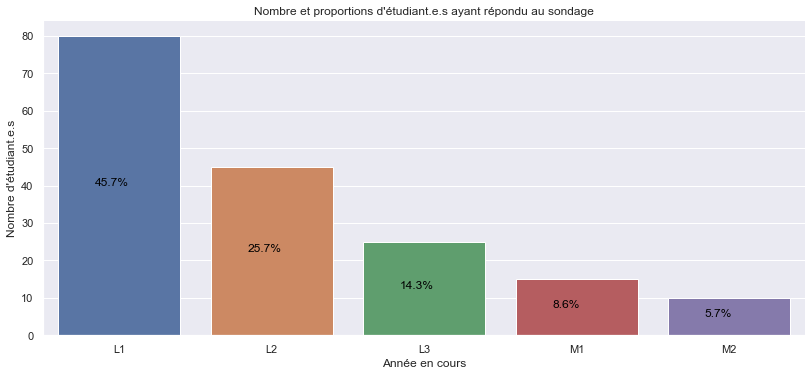

In [19]:
plot = sns.catplot(x="En quelle année êtes-vous ?", kind="count", data=data, aspect=18/8)
plot.set_axis_labels("Année en cours", "Nombre d'étudiant.e.s")
plot.ax.set_title('Nombre et proportions d\'étudiant.e.s ayant répondu au sondage')
perc_no_hue(plot.ax , "En quelle année êtes-vous ?")

### Ressentis et retours par rapport à l'enseignement

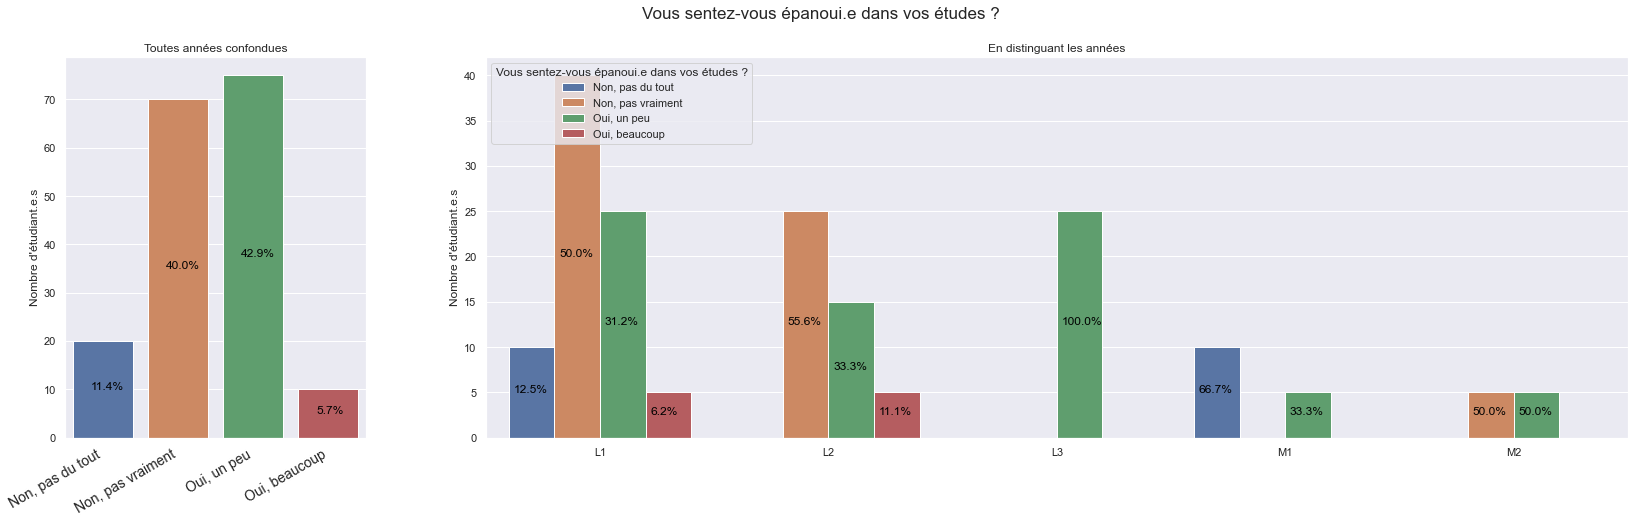

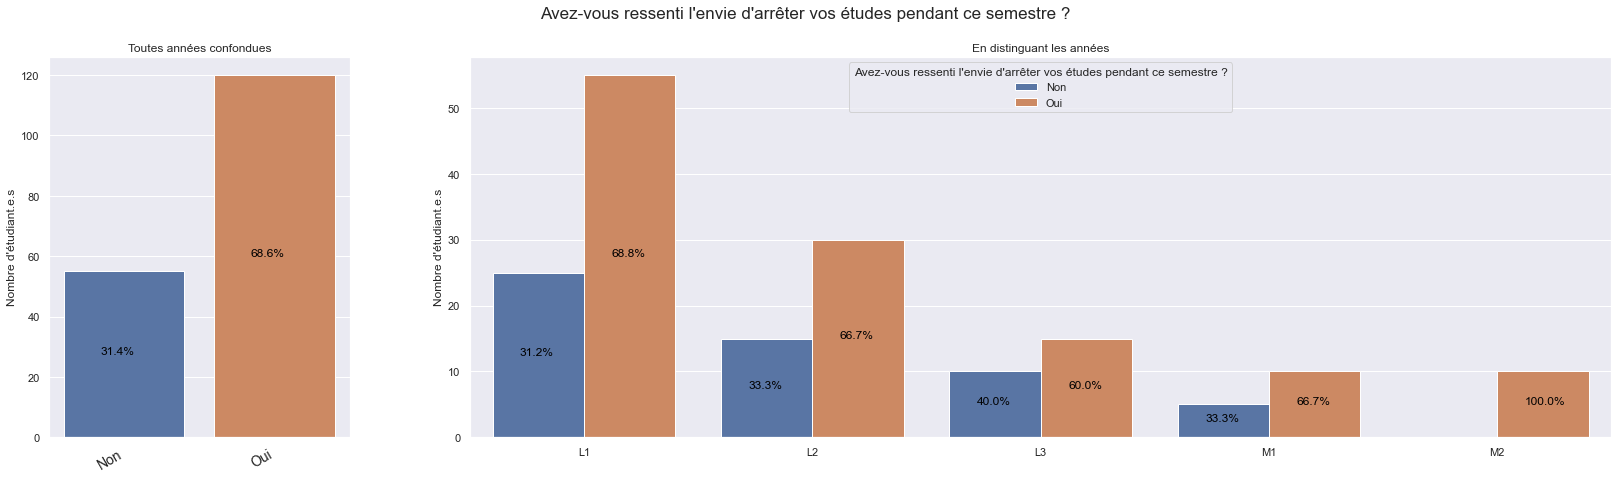

In [20]:
for i in lab_questions_cours :
    plot_both(i, "En quelle année êtes-vous ?" )

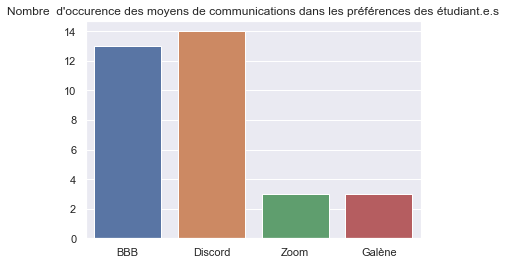

In [21]:
list_outils = ['BBB', 'Discord', 'Zoom', 'Galène']
count_outils =[]
count_outils.append(len([c for c in data['Quels outils avez-vous préférés pour les cours en distanciels ?'].cat.categories if 'BBB' in c or 'Bbb' in c or 'bbb' in c]))
count_outils.append(len([c for c in data['Quels outils avez-vous préférés pour les cours en distanciels ?'].cat.categories if 'Discord' in c or 'discord' in c]))
count_outils.append(len([c for c in data['Quels outils avez-vous préférés pour les cours en distanciels ?'].cat.categories if 'Zoom' in c or 'zoom' in c]))
count_outils.append(len([c for c in data['Quels outils avez-vous préférés pour les cours en distanciels ?'].cat.categories if 'Galène' in c or 'galène' in c or 'galene' in c or 'Galene' in c]))

ax = sns.barplot(x = list_outils, y= count_outils)
ax.set_title("Nombre  d'occurence des moyens de communications dans les préférences des étudiant.e.s")
plt.show()

In [22]:
print_markdown(labels_text_cours)

## <span style="color:red">Avez-vous ressenti une amélioration ou une détérioration des conditions d'enseignement ce semestre par rapport au semestre précédent ?</span>
## <span style="color:blue">L1</span>
 * Il n’y a pas vraiment eut de changement.
 
 * Non
 
 * pour moi , la majorité des Cours c est bien passé, j ai eu des cours que j ai grave galéré aussi comme l'IP2,  cours auquel on devrait regardé des vidéos de plus de 50 minutes sur YouTube , et ça passé pas si bien ; je l dis bien c est pas la faute du prof mais je parle de mon cas je me sens démotivé , c est comme si tu passe 1h de ton temp a regardé un film que toi même t aime pas , au bout de quelques minutes tu arrêtes tu te dis ça sert à rien et avec ça je me suis retrouvé avec plusieurs cours à découvrir toute seule et là c est la catastrophe 
 
 * C’était de pire en pire de mon côté, on avait le soutien des enseignants pour le premier semestre pour des notions types introduction mais arriver au deuxième semestre, la communication était super flou. De plus, j’avais une impression que l’on avait sauté plein d’étape d’un coup.. soit disant pour que l’on rattrape un retard.. mais ça n’a qu’empirer de plus en plus les cours ( j’étais en full distance )
J’ai ressenti un énorme vide entre ce qu’on a appris et ce que l’on a eux sur certains examens ( L1 info )
 
 * Oui, j'ai ressenti une détérioration des conditions 
 
 * Aucune amélioration 
 
 * Plus de distanciel au deuxième semestre donc détérioration. 
 
 * Plutôt une détérioration
 
 * E
 
 * Pas de changement entre les deux semestres 

## <span style="color:blue">L2</span>
 * Larges améliorations. 
On attend juste une reprise 100%
 
 * Ce semestre, les conditions d'enseignement étaient difficiles avec seulement un jour en présence par semaine, ce qui selon moi n'était pas du totu assez.
 
 * Pas vraiment.
 
 * Détérioration 
 
 * Pas particulièrement.
 
 * Pas specialement
 
 * Détérioration car le présentiel c'est important (mais les amphis à distance c'est une bonne idée).
 
 * amélioration, ca avait l'air d'etre mieux organiser, et on avait moins l'impressions que personne n'avait été preparer a l'eventualité du distanciel

## <span style="color:blue">L3</span>
 * Une détérioration dû à la distanciation en grande partie
 
 * Moi en fait j'aime pas les cours pas distances et aussi il nous donné des projet + examens final pour note la moyenne des modules j'ai pas aimé j'aurais aimé avoir 2 ou 3 cc pour connaître notre niveau avant l'examen 
 
 * Des cours toujours mal adaptés, des tds un peu mieux qu'au premier semestre.
 
 * Non je n'en ai pas ressenti
 
 * plutôt une amélioration.

## <span style="color:blue">M1</span>
 * Détérioration du fait du distanciel, c'est vraiment compliqué de suivre les cours
 
 * une deterioration 

## <span style="color:blue">M2</span>
 * Améliorations pour certains enseignants que j'avais eu au semestre précédent, mais la plupart des nouveaux enseignants avaient des pratiques équivalentes ou moins bonnes que leurs collègues.

## <span style="color:red">Quels cours avez-vous le plus aimés ? Avec quels professeurs ?</span>
## <span style="color:blue">L1</span>
 * Les cours de Concept Informatique avec Daniela Petrisan.
 
 * IP2
 
 * IP2 en tp avec daniela petrisan. Elle était très à l'aise dans son cours et dans la façon d'enseigner. Ses explications étaient très clair. Elle faisait aussi participer tous les étudiants.
 
 * pour moi j ai grave aimé les cours de TD et TP 
 
 * Tout les cours étaient en soit bien, on sentait qu’il y avait l’effort et l’envie des professeurs. Mais ces cours en distanciels ne valent pas les cours en presencielle 
 
 * Je ne peux pas mettre en évidence 
 
 * Le cours que j’ai le plus aimé c’est le cours de maths du semestre 1 avec Noé Cuneo.
 
 * Le cours "concepts informatiques" est mon gros coup de cœur pour ce semestre, des notions très intéressées et j’ai découvert la récursion que je connais que très peu. Le livre conseiller par la prof (Fondements de la programmation) que j’ai dévoré en précisant que le dernier livre que j’ai lue (sans y être obligé) dater de la primaire. PS : Daniela Petrisan qui fessait les CM et les TD pour mon groupe qui a fait du super boulot.
 
 * Le TD d’IP2 avec Aziz Fouché, c’est très interactif et les explications sont très claires
 
 * E
 
 * Les cours de CI avec madame Petrisan

## <span style="color:blue">L2</span>
 * C'est particulièrement grâce à la matière et au fait qu'elle soit en présentiel pour les TD, mais Eléments d'algorithmique.
 
 * J'ai le plus apprécié les cours d'Elements d'Algorithmique avec Camille Combe
 
 * Les TP de c était pas mal surtout avec la prof du groupe 6 qui était la pour nous aider.
 
 * Pas d'avis 
 
 * OL4, M. Perifel présente bien les notions avec ses petits schémas, l'évaluation continue avec CC et DM permet de s'assurer qu'on acquiert bien les compétences sans mettre de pression par rapport à la note
 
 * outils logique avec melodie lapointe, elle essayait de bien nous expliquer et de voir ou on en étais avec des quizz

## <span style="color:blue">L3</span>
 * Les cours de Programmation Reseaux avec M. Sangnier, il répondait à des questions avec une pointe d'humour de temps en temps, ce qui donnait une bonne atmosphère aux séances de cours. Mais le plus important était qu'il avait fait des cours complets en pdf et vidéos assez compactes, avec des exemples précis, ce qui nous permettait de suivre quand on voulait dans la semaine, pour faire les TPs ensuite.
En TP avec Mme. Micheli, surtout en présentiel, les séances étaient très agréables, elle nous aidait lorsqu'on avait des difficultés, et nous expliquait en détail les problèmes rencontrés.
 
 * Je me rappelle pas des nom des prof mais j'ai aimé langage script et un peu web
 
 * Optimisation (Guillaume garrigos), programmation réseaux (Arnaud Sangnier), TDs Algèbre (Olivier Brunat), Algorithmique (François Laroussinie)
 
 * Anglais avec madame Lindsey Paek, très bonne énergie, proche des élèves, donne envie de participer pour autre chose que la note.
 
 * Difficile de dire, suivre les cours avec un casque sur les oreilles, des travaux en fond sonore, les conversation zoom de la compagne ne sont pas des conditions idéales, surtout quand on n'a pas pu sortir de la journée ni vu qui que ce soit d'autres. Dans l'ensemble je n'ai rien retenu des cours et me suis endormi à chaque séance. Très mauvaise idée d'enchainer 4 heures de cours en visio. J'ai bien aimé le cours de logique et la discussion de l'enseignant avec les élèves, dommage qu'il ait été extrêmement en retard sur les TD, qu'il ait donné des thèmes qu'on n'avait traité ni en cours, ni en TD au partiel. Le pdf de Logique était excellent, et l'ensemble des pdf en général étaient très bons, tant est si bien qu'il était préférable d'étudier sur le pdf, les questions d'examen portant plus sur ce cours que sur les TD qu'on avait fait.  Le cours de réseau était très bien également néanmoins les deux heures consacrées au cours étaient remplies par des questions réponses, ce qui implique qu'on doive trouver ces deux heures ailleurs, impossible pour un élève qui travaille.

## <span style="color:blue">M1</span>
 * Les TD de base de données avancée avec Sylvain Schimtz, ils étaient très préparés et interactifs
 
 * programmation System avec Mr.Zielonka
Anglais de specialite avec Lindsay Peak

## <span style="color:blue">M2</span>
 * Au 1er : Le cours de BDD, le cours de POCA, le cours de NLP avec Mr Simoulin
Au 2d semestre : Le cours de MAAIN de Mr Perifel

## <span style="color:red">Quels cours avez-vous le moins aimés ?</span>
## <span style="color:blue">L1</span>
 * Les cours d’Initiation à la Programmation 2.
 
 * Mathématique parce que c'est une matière détestable
 
 * Internet et outils car comme il n'y avait pas de tp noté, je ne suis pas allé dans tous les tp et cela m'a fait décrocher la matière
 
 * les Cours magistraux je vois pas à quoi ça sert 
 
 * Difficile de comprendre les explications 
 
 * Les cours que j’ai moins aimés sont IS1 et IP1. Je trouve que les professeurs ont bâclé les notes. Par exemple nos tp n’ont pas été corrigés on a donc eu une note d’implication...
 
 * Le cours « Internet et Outils » était très bon, mais j’ai été obligée d’utiliser PHP pour le projet de site web à rendre, j’ai notamment découvert ma HAINE de PHP. Les cours sont bon en soit mais MVC + PHP = BURNOUT.
 
 * IO2, j’aurais aimé avoir peut-être un petit TD avec de bonnes explications complémentaires, je me suis senti un peu comme si on m’avait d’office largué en TP (qui étaient un peu trop longs d’ailleurs)
 
 * Anglais 
 
 * E
 
 * Les cours d’IP qui fonctionnaient pas vidéos YouTube

## <span style="color:blue">L2</span>
 * Outils Logiques, mais en révisant pour les examens j'ai apprécié la matière.
Je pense donc que c'est à cause du distanciel.
 
 * J'ai moins aimé le cours d'Outils Logiques à distance avec Amélie Gheerbrant, car malgré que la professeur explique bien, la matière était très complexe et je trouve que 2h30 d'affilés de cette matière sont durs à suivre
 
 * Je dirai le cours de EA4, ce qui est étonnant vu que nos td était très bien, on comprenait vraiment toute les notions avec Mr Giovanni, mais les amphis de EA4 était beaucoup trop long et les diapos également. Notamment je pense aux 30 diapos utilisées pour le déroulement de l'algorithme de "tri sélectif" (cours 4). Les tps étaient intéressant mais le temps de rendu était souvent inadaptés notamment pour les deux derniers tps, aussi ces tps avait des énoncés un peu compliqué à comprendre par moment sans trop d'exemple pour illustrer ce que les profs attendaient. 
 
 * Outils logique. Même si le professeur était bien la matière n’est pas interessante en distanciel. 
 
 * Pas d'avis juste des matières qui ont été gâché par le distancié comme la logique 
 
 * EA4, la notation est étrange...
 
 * EA, les TP était trop long et vraiment nous balancer sur du python quand on a jamais fait avant c'était pas cool

## <span style="color:blue">L3</span>
 * Les cours de Programmation Web (M. Padovani) et Langage de Script (M. Zacchiroli), malgré le fait qu'ils expliquaient et envoyaient des réponses aux questions de TP, les séances paraissaient vides, avec des professeurs quasi fantômes, c'était décourageant, et démotivant.
Je comprends néanmoins que c'est très dur de parler tout seul dans le vide sans recevoir de réponses ni de réactions, et que c'est également en partie de la faute des étudiants.
 
 * Intégration et série de Fourier, logique (cours parcours maths-info), les cm en mathématiques et quelques cm en info : format de cours non adaptés, les 2h de cours monotones ne passent pas mieux qu'au premier semestre, l'alternative de plusieurs petites vidéos (fait en one shot) auraient été bien pour ces matières, avec des séances de questions réponses d'une heure pour les intéressés.
 
 * Base de donnée.
Explications confuses, chargé de TD très sympathique mais qui ne comprenait pas forcément beaucoup mieux que nous les corrections. 
 
 * Les cours étaient égaux dans l'ensemble. Gros problème en TD d'algèbre avec M Brunat. M Brunat est une personne très gentille qui nous a fourni de très bonnes corrections d'exercices APRES les TD, son pdf d'algèbre du premier semestre était également très bien fait, néanmoins au cours des TD nous ne faisions clairement aucun exercice.  L'enseignant apprécie visiblement les leçons et pas la résolution d'exercices, et nous avons un désaccord pédagogique là dessus. Je crois que pour toucher du doigt les concepts un peu abstraits il faut commencer par mettre les mains dans le camboui du calcul et des recettes toutes faites, même si on les trouve "bête", jusqu'à ce que les jonctions se fassent dans l'esprit de l'élève, sans avoir à expliquer les grands principes avant. M Brunat pense l'exact opposé et semble s'imaginer qu'il est préférable de donner les principes généraux par oral pendant une heure, pour ensuite être capable de résoudre l'exercice en 2 coups de cuillères à pot. Si je vous donne une liste de 6 noms vous arriverez à vous en souvenir, si j'en rajoute 4 vous les oublierez tous, l'accumulation d'information n'a jamais été une bonne méthode pour enseigner, elle permet néanmoins de classer ceux qui ont une bonne mémoire et une bonne attention des autres. Dans l'ensemble on a été plutôt gaté dans nos enseignants, comme toujours à Diderot je dirais, même si j'ai aussi toujours l'impression que les MFA ont des chargés de TD bien plus rigoureux.

## <span style="color:blue">M1</span>
 * Base de données avancées
 
 *  le cours de base de données , pas trop Clair et aucun support de cours fournit ,comment pouvoir reviser ses cours si on a aucun support?

## <span style="color:blue">M2</span>
 * Au 1er : Le cours d'Architecture des systèmes de base de données et le cours d'Introduction au Machine Learning (5h30 d'un coup c'est impossible de tenir jusqu'au bout)
Au 2d : Le cours d'Algorithmique répartie  de Mr Fauconnier 

## <span style="color:red">Quels outils avez-vous préférés pour les cours en distanciels ?</span>
## <span style="color:blue">L1</span>
 * BBB et discord , les cours enregistré ne permettent pas de poser de questions. Donc n’importe quel cour qui permette une réel interaction avec le professeur est bien.
 
 * BBB
 
 * Bbb
 
 * j ai beaucoup aimé Discord mais aussi BBB
 
 * Discord le meilleur 
 
 * Moodle et zoom
 
 * BBB était plus pratique
 
 * BBB était le meilleur 
 
 * Z
 
 * Discord et BBB

## <span style="color:blue">L2</span>
 * BBB est moins interactif que Discord, mais Discord n'est pas parfait pour donner des cours. En clair, un outil où on peut participer autrement que par seulement la parole (je sais que c'est possible par BBB etc, mais c'est rare) 
 
 * Discord
 
 * Moodle, discord et BBB
 
 * Discord et BBB
 
 * Galène (que nous utilisions en OL) est très bien.
 
 * Pas d'avis mais discord peut être chiant quand le groupe n'est pas mâture : des gens qui parlent en plein milieu ça va 2minutes mais stop. 
 
 * Discord, Galene 
 
 * discord de très loin, sinon BBB en deuxième

## <span style="color:blue">L3</span>
 * Définitivement les cours sur discord, on peut communiquer, partager son écran, se réunir dans des plus petits groupes, le tout facilement, et on peut également laisser une trace en messages, épinglable, ce qui nous permet de revoir facilement des points du cours si on a des doutes.
De plus, cela rend la communication avec certains professeurs beaucoup plus simple et pratique, nos questions sont posées et repondues en public, et tout le monde y en profite.
 
 * Discord et zoom
 
 * Bbb et zoom pour les cours, discord pour les communications par rapport au cours
 
 * Tous se valent, mais je suis plus habitué à discord.
 
 * les polys, les TD.

## <span style="color:blue">M1</span>
 * BBB était le mieux.
Gather Town était intéressant, mais pas forcément le plus pratique.
 
 * Discord
 
 * BBB

## <span style="color:blue">M2</span>
 * BBB et Galene

## <span style="color:red">Y'a-t-il des éléments du distanciel que vous souhaitez garder ?</span>
## <span style="color:blue">L1</span>
 * Les serveurs discord car les réponses aux questions des élèves sont publics et les profs y répondent aussi plus rapidement.
 
 * Les serveurs discords sont des bonnes choses, certains professeurs sont souvent présent pour les questions sur discord, et discord peut aussi être un lieu de partage entre étudiant (surtout que l'on peut plus facilement rencontrer des personnes d'autres classes et avoir leur "point de vu").
 
 * Avoir accès aux poly en ligne et avoir accès à l'enregistrement de l'amphi (même si c'est plusieurs jours après pour ne pas inciter les élèves à ne pas assister aux amphis)
 
 * les Serveurs Discord
 
 * Les liens en poly sur Moodle 
 
 * Des liens 
 
 * Non
 
 * Serveurs discord. 
 
 * Les polys et les serveurs discord sont vraiment utiles
 
 * Z
 
 * Les serveurs discord permettent une communication public et plus rapide avec les professeurs 

## <span style="color:blue">L2</span>
 * Les vidéos de rediffusion m'ont littéralement sauvé la vie pour Outils Logiques

 
 * La possibilité de revisionner les amphis et les séances de TD
 
 * Mettre en place un serveur discord pour le module semble être une bonne idée, cela permet de contacter plus facilement les étudiants de notre promotion.
Egalement pouvoir parler en mp ou dans un salon général est souvent plus rapide et efficace que de parler par mail.

 
 * Les tests d’auto-évaluation
 
 * La possibilité de regarder l'amphi après grâce aux enregistrements.
 
 * Les pdf sur moodle c'est important 
 
 * Les serveurs Discord, l'enregistrement des séances, les CM sur Zoom/BBB
 
 * les serveurs discord c'était pas mal, 

## <span style="color:blue">L3</span>
 * Les serveurs discord ainsi que des vidéos compactes, ou pdf cours, qui récapitule le cours, surtout les points importants.
Je trouves personnellement que c'est les 2 choses qui m'ont le plus aidé pour comprendre les cours.
 
 * Discord et zoom 
 
 * Les polys peuvent être bien oui, c'est un bon support.
 
 * A vrai dire les serveurs discord sont pratiques pour diffuser des informations générales. Pour ce qui est des cours en général non.
 
 * Les poly

## <span style="color:blue">M1</span>
 * Les polys (quand on accepte de nous les donner mdr) 
 
 * les polys des cours et les serveurs discord

## <span style="color:blue">M2</span>
 * Les polys en avance à tout prix
La mise en ligne d'un pdf du cours, correction des exercices
Les sessions de questions réponses libres 

## <span style="color:red">Si on devait repasser en distanciel l'année prochaine, quels cours devraient être gardés en priorité en présentiel ?</span>
## <span style="color:blue">L1</span>
 * Les TP devront être en presentiel et ce qui concerne les CM en général, ils peuvent être en distanciel tant que les professeurs choisisse une plateforme interactif.
 
 * Mathématique parce que c'est déjà assez imbitable comme ça donc à distance c'est encore pire...
 
 * Programmation 
 
 * IO2 et un peu IP2 
 
 * Les TDs
 
 * La programmation !
 
 * Mathématiques et Java. 
 
 * Je ne saurais pas trop dire, en tout cas les cours de programmation et de maths (je suis en maths-info) me semblent essentiels au moins partiellement en présentiel
 
 * Z
 
 * Les tp en général 

## <span style="color:blue">L2</span>
 * Tous 
 
 * Tous :)
 
 * Tous les modules qui ne concernent pas la programmation, notamment je pense au maths ou au matière de logique.

 
 * Outils logique et les TDs d’Élément Algorithme 
 
 * Le plus gros avantage pour moi du présentiel est la motivation qu'on retire de travailler en groupe, donc les plus difficiles.
 
 * La logique, les maths : cad les matières où une très bonne compréhension est importante 
 
 * Les TP. Puis les TD.
 
 * maths, et les cours a plus haut coef

## <span style="color:blue">L3</span>
 * Les cours de TP, c'est là où on apprend le mieux, car on peut pratiquer, et on est encadré si on rencontre des difficultés.
 
 * Les tds en mathématiques, les tps/tds en informatique. 
 
 * - Grammaire et Analyse
- Réseaux
 
 * je pense aller à l'encontre de l'idée commune, mais les cours magistraux plutôt que les TD. Un aspect également qui me faisaient beaucoup réviser en L2, des petits contrôles continus plus fréquents, et si en distantiel de PETIT dm, pourquoi pas non notés. Nous n'avons rien pratiqué cette année.

## <span style="color:blue">M1</span>
 * Tous
 
 * le cours de genie logiciel

## <span style="color:blue">M2</span>
 * Tous, à défaut les cours d'algorithmiques qui sont imbitables à distance



#### AST

Nous n'avons pas eu de réponses de personnes concernées concernant ce cours. En effet la participation des M2 à ce sondage à été très faible.

### Communication

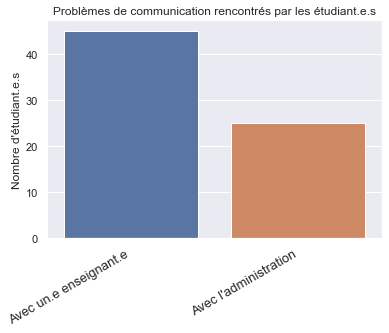

In [28]:
data[lab_questions_communication]
list_communication = [ 'Avec un.e enseignant.e', 'Avec l\'administration']
count_communication =[]
count_communication.append(len([c for c in data['avec un.e enseignant.e ?'] if c == 'X']))
count_communication.append(len([c for c in data['avec l\'administration ?'] if c == 'X']))

ax = sns.barplot(x = list_communication, y= count_communication)
ax.set_title("Problèmes de communication rencontrés par les étudiant.e.s")
ax.set_xticklabels(list_communication, fontsize=13, rotation=30, ha= 'right')
ax.set_ylabel('Nombre d\'étudiant.e.s')
plt.show()

In [24]:
print_markdown(labels_text_communication)

## <span style="color:red">Avez-vous des commentaires au sujet de la communication ?</span>
## <span style="color:blue">L1</span>
 * Non, je n’ai pas vraiment eut de problème à ce niveau là.
 
 * Avec l'administration j'ai l'impression qu'on est mis au courant un peu trop tard parfois, et pour les enseignants certains de mes mails n'ont surement jamais été lu ni ouvert donc bon
 
 * Non
 
 * Je voudrais être plus informer 
 
 * Peu de communication à part pour les contrôles. 
 
 * Z

## <span style="color:blue">L2</span>
 * La communication pendant cette période était assez flou, je ne blâme personne car c'est vrai que c'est dur d'organiser des cours dans de telles conditions
 
 * J'ai eu toutes les informations nécessaires.
 
 * Non
 
 * j'aimerais bien qu'on ait un endroit avec toutes les info importante marquer


## <span style="color:blue">L3</span>
 * Je n'ai pas reçu ma carte étudiante, alors qu'on est en juin.
 
 * Un cours en distanciel sera toujours moins efficace qu'un cours en présentiel pour moi.
Bravo cependant à l'équipe pédagogique pour ces efforts.
Mais poser des questions et comprendre les réponses est bien plus dur en distanciel.
 
 * c'était mieux, plus de git déjà. Mais par pitié forcez les enseignants à tout mettre sur moodle, même si ils le mettent ailleurs. Un dm a été annoncé à une poignée. Petit exemple des supports pour le 6 ème semestre uniquement, où les informations étaient différentes
Licence de maths: Moodle, Discord
Licence MI en plus, Moodle, Discord
Licence d'info, Moodle, Discord,
Réseaux: site personnel d'Arnaud Sangnier, Discord, QR sur Discord,
Analyse de donnée: site personnel d'Amélie Ger....je ne sais plus...rdt, Discord, Moodle, cours sur zoom.
Grammaire et Analyse syntaxique: site personnel de Ralf Treinen, Discord, Moodle, cours sur BBB .  
Algèbre:Moodle
ISF: Moodle, un des chargés de TD de MFA avait donné aussi des petits résumés sur son site personnel. C'est toujours bien d'avoir les corrections et les tip des autres, les TD était sur BBB, un responsable a jugé bon de mettre une identification ce qui a parfois causé des soucis, des problèmes avec firefox à un moment, ouverture de BBB avec chrome obligatoire, le bordel.
Logique: Moodle, cours sur ZOOM, TD sur un autre serveur ZOOM
Bref, quand on perd les identifiants d'un cours, c'est la mort, il faut remettre le doigt dessus, si ça se trouve il est dans un email, si ça se trouve il est sur moodle, que de complications inutiles, je crois qu'il faut imposer une plateforme unique et former les réfractaires par la force si il le faut.

## <span style="color:blue">M1</span>
 * Pourquoi apprends ton les modalités d'évaluation de notre master juste avant le début de nos partiels ? (Notamment que l'anglais est considérée comme une UE à part qui ne compense rien, ou qu'il faut avoir 8 minimum à une matière. Pourquoi attendre la fin du 2eme semestre pour nous donner un rapport concernant toute l'année ???)

## <span style="color:blue">M2</span>
 * Pas ou peu d'information sur les problèmes rencontrés par les enseignant.e.s, informations tardives sur les modalités d'examen



### Conditions de vie

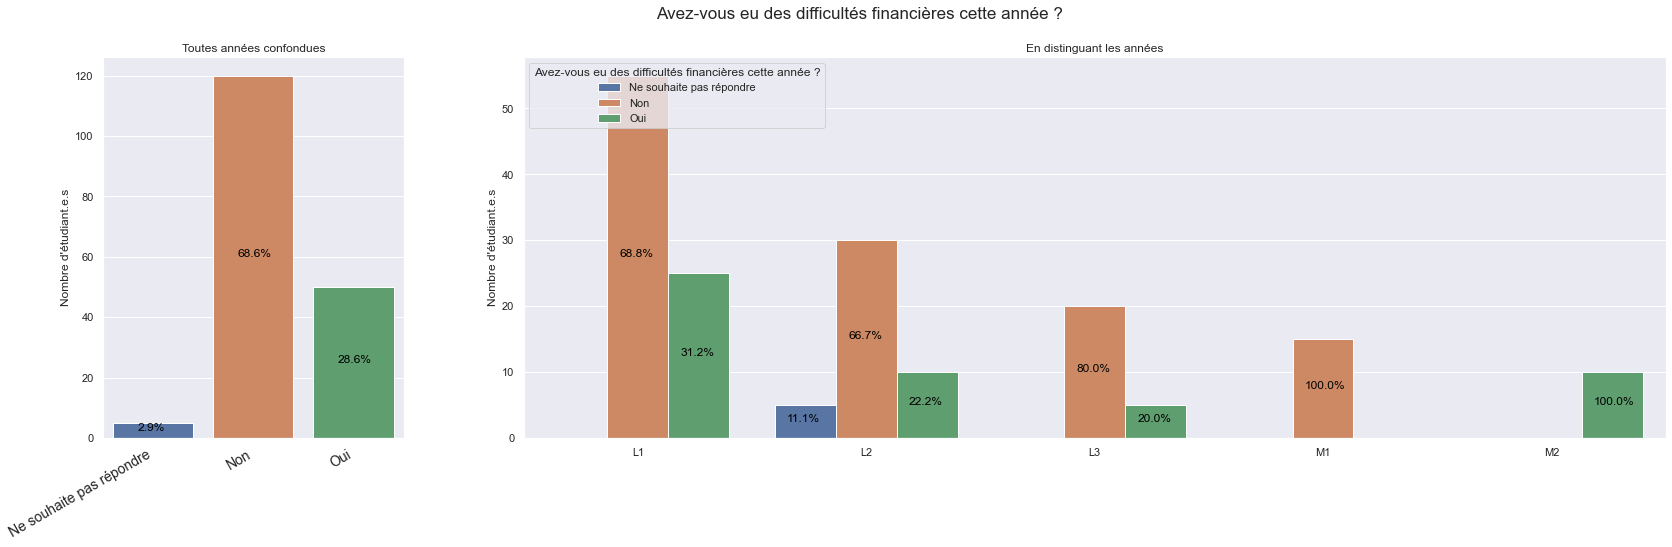

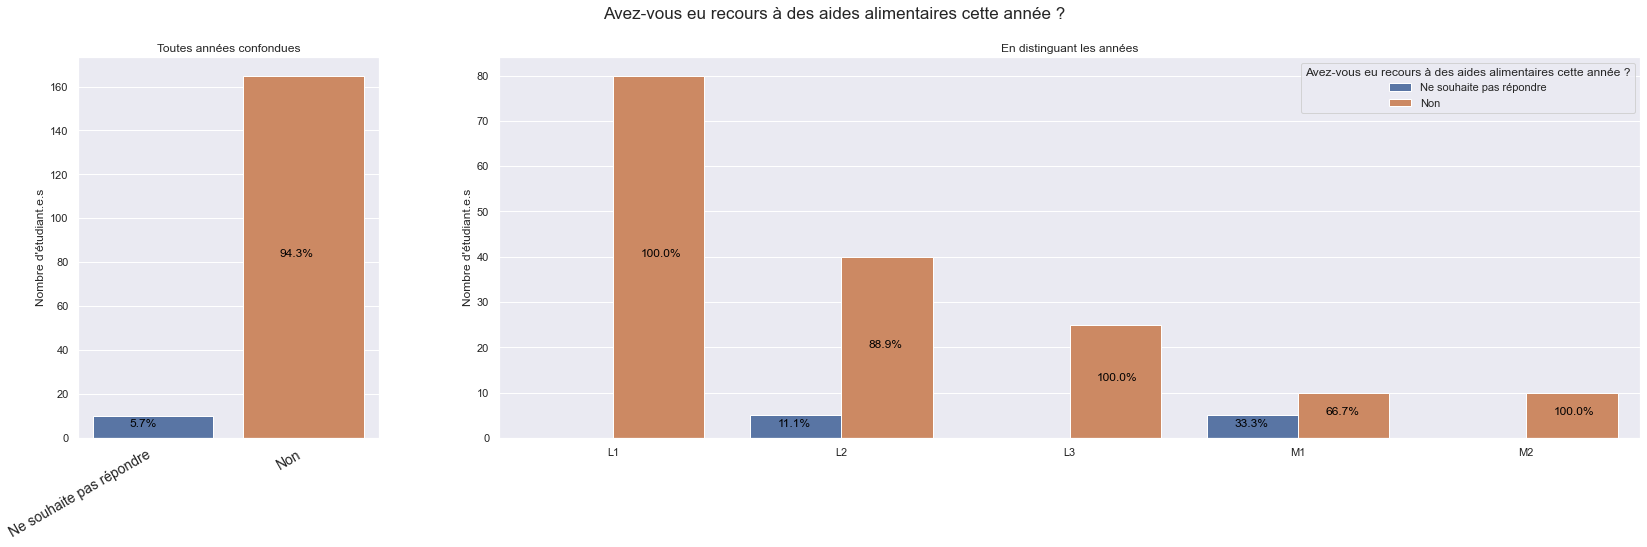

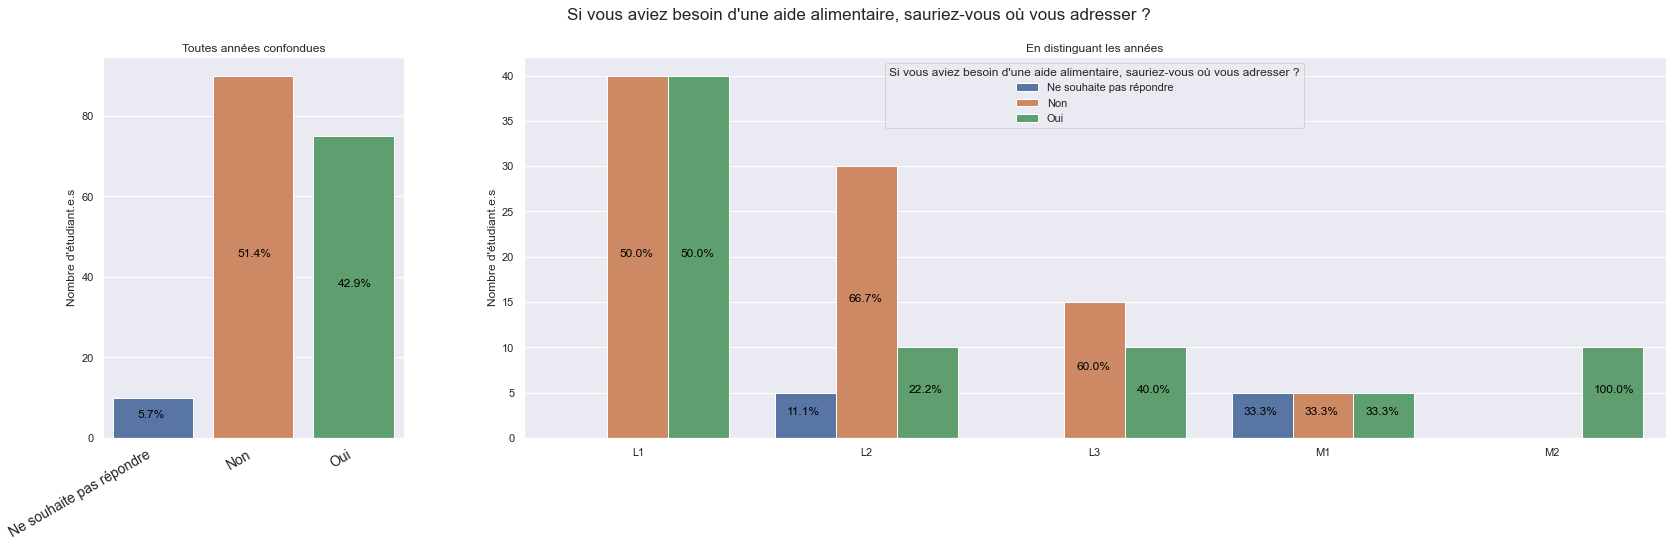

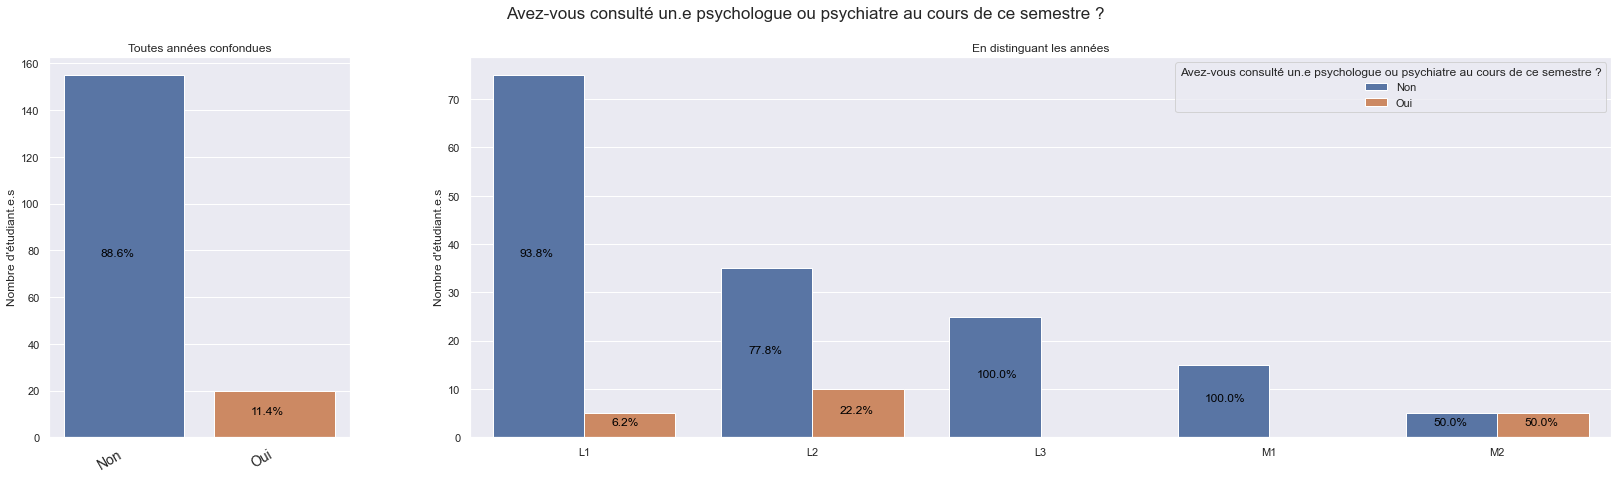

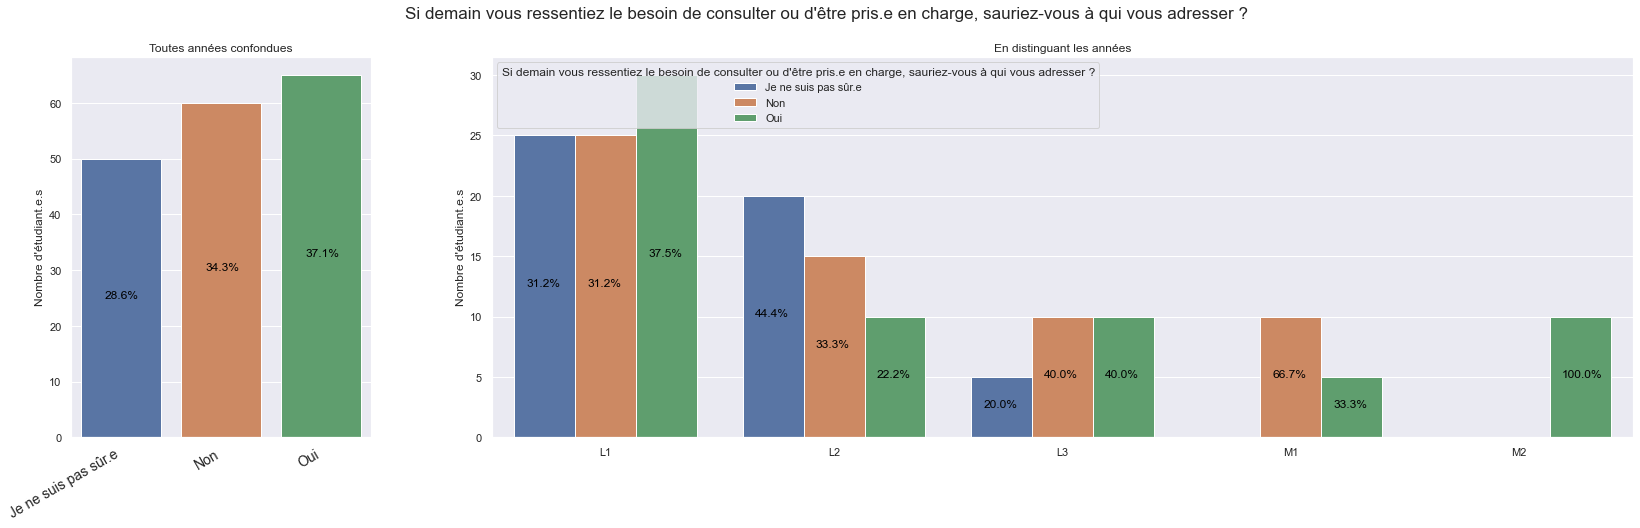

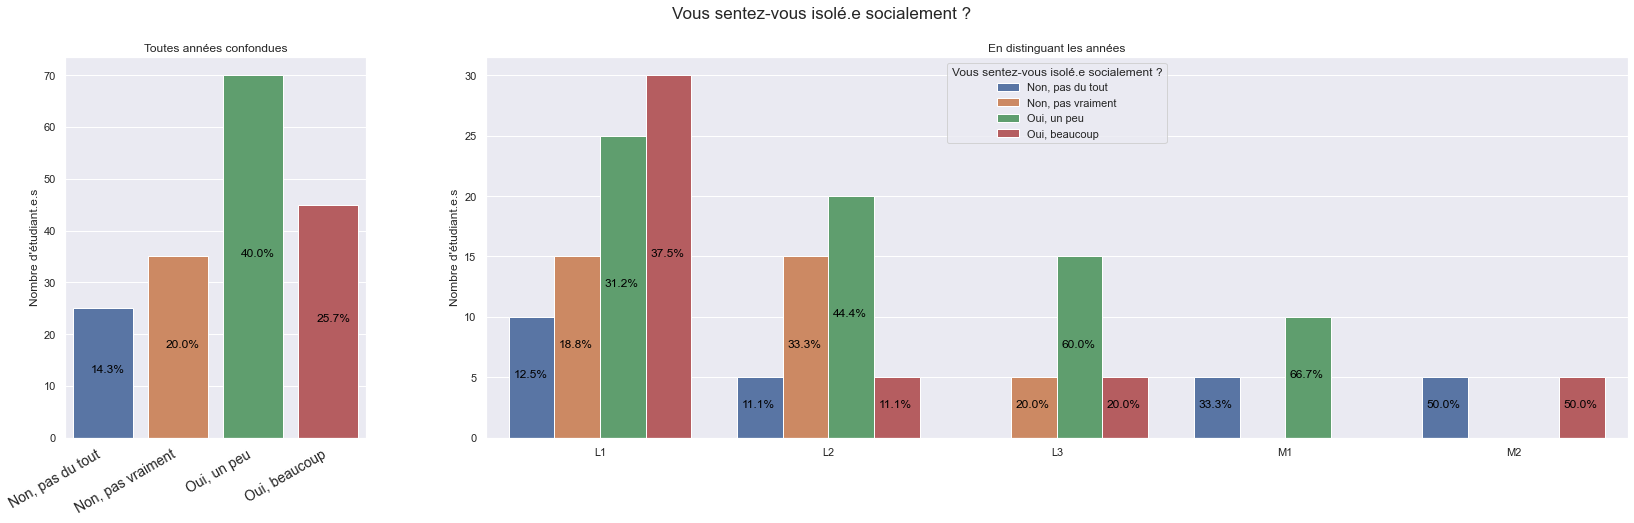

In [25]:
for i in lab_questions_vie :
    plot_both(i, "En quelle année êtes-vous ?" )

In [26]:
print_markdown(labels_text_vie)

## <span style="color:red">Voulez-vous écrire un témoignage sur vos conditions de vie ?</span>
## <span style="color:blue">L1</span>
 * Non
 
 * niveau financiere  , j ai pas à me plaindre

## <span style="color:blue">L2</span>
 * J'apprécie ma vie sur le campus des Grands Moulins 
 
 * Je ne suis pas à plaindre

## <span style="color:blue">L3</span>
 * Stressante
 
 * j'ai travaillé, ça me prend du temps et ça m'épuise.

## <span style="color:blue">M2</span>
 * Ne recommenderai pas à un ami les conditions de cette dernière année



### Mots de la fin

In [27]:
print_markdown(labels_text_dernier_mots)

## <span style="color:red">Un dernier mot à nous dire ?</span>
## <span style="color:blue">L1</span>
 * Cette année n’a pas été facile et je pense que les professeurs auraient du mettre tout en œuvre pour que les élèves réussissent (et je ne parle pas de donner des points gratuitement ou de laisser tout le monde passer). Cependant, organiser plus de contrôle continu, de séance de question - réponse, donner des corrections d’annale pour que les élèves puissent s’entraîner n’auraient pas été du luxe. Globalement très peu de profs ont fait cela, je comprends que les profs veulent préserver “l’intégrité du diplôme” mais je pense qu’ils auraient également pu le faire même en organisant des contrôle, parce que basé la note finale sur 2 notes n’est pas corrects. 
 
 * Merci a tous pour cette année FORMIDABLE, j'ai choisi l'informatique au pif et j'ai bien fait (rien a voir), cependant je trouve que le fonctionnement du cours IO2 est a revoir, quand on nous apprend 2 semaines avant le rendu final l'existence des clé étrangères alors que nos bases de données sont déjà mises en place depuis un voir deux bon mois, je trouve cela un peu ridicule ... Enfin bon j'ai quand même passé une bonne année, et la filière me plait (C'est quand même grave dur l'informatique !). 
 
 * Le discord de votre association est cool pour partager et s'aider, gardez ce serveur :)
 
 * cette année , en tant que première année d'université , j ai pas vraiment kiffé , c'était pas du tout ce que je croyais de la fac mais on s'adapte  :(
 
 * Je ressens de fortes inquiétudes quant au fait que je ne comprends pas beaucoup (en particulier les explications de certains enseignants), je suis isolé, je ne meurs pas de savoir comment construire correctement un plan d'apprentissage. 
 
 * Je fais des phases maniaques depuis le début du semestre et j’ai eu du mal à valider parce que je n’avais pas la force d’aller en cours, j’espère que je ne passerai pas 3 années comme celle-là je ne le supporterai pas
 
 * Pourquoi les TP à faire, ne sont t’il pas ensuite corrigé par les professeurs et mis à disposition sur moodle ? Cela en aiderais plus d’un car aucun correction n’est faite et aucune trace de celle-ci n’est laisse, c’est dommage 
 
 * Non

## <span style="color:blue">L2</span>
 * Vive le présentiel
 
 * Pour conclure, je dirai que j'ai passé une bonne année, voila, zoubie à vous et merci de ce sondage.
 
 * J'espère que ça va vite se terminer parce que je suis à bout mentalement mdr. 
 
 * Le 100% distanciel c'est vraiment à éviter, on sature

## <span style="color:blue">L3</span>
 * C'était vraiment une année difficile en charge de travail et de stress, pour la plupart d'entre nous, nous avions eu 8 à 10 projets environ au cours de cette année (de longueur variée), 10 pour ma part, et c'était difficile de suivre les cours, faire les TPs, en même temps travailler sur plusieurs projets différents, et d'essayer de comprendre les subtilités dans tous les cours, c'était vraiment difficile, et mal à vivre.

J'ai personnellement la chance de ne pas avoir eu trop de difficultés à la maison, c'est à dire, je n'ai pas vraiment eu de problèmes alimentaires, ni d'activités qui nécessite énormément de temps (certains avaient d'autres cours extra-scolaires, ou bien un travail), du coup j'ai pu finir plus ou moins tout les projets juste en sacrifiant quelques heures de sommeil, mon mental et la difficulté de suivre les cours du lendemain matin.
Pourtant cela restait limite niveau timing, on avait une overdose de travail, ce qui pouvait rendre certains projets baclés, et malgré tout cela, on finissait juste à temps peu de temps avant les débuts des examens. Autant vous dire qu'on n'a pas pu réviser énormément, et sinon se préoccupait plus à faire des fiches utiles pour les examens, car on avait l'autorisation (MERCI) d'avoir plusieurs feuilles de notes aux l'examen.

Bref c'était une année très stressante et chargée, mais les professeurs nous notaient en grande partie, assez généreusement, ce qui nous a rassuré et aidé.

Un grand merci à toute l'équipe pédagogique, pour le travail fourni, qui ont dû souffrir autant que nous, et un grand merci également aux étudiants pour votre travail acharné, et surtout à ceux qui essayaient de leur mieux d'aider les autres sur discord.
 
 * Ornithorynque
 
 * Reformulez ce formulaire, les gens ne vont répondre à la section COURS en parlant des cours car il n'y a pas de section TD, heureusement que j'avais anticipé, décidément je suis vraiment trop fin psychologue. C'était trop dur cette année, et j'ai vraiment envie d'être en vacance, merci d'arrêtez de nous filez des projets impossibles pour les rattrapages à faire quand il fait 30 ° dehors et qu'on n'est pas sorti depuis 6 mois, surtout pour se taper un 8 au final. Et je ne suis pas d'accord avec les différentes pondérations entre projets et examens pour les différentes matières. Exemple, GAS est un cours assez théorique et on n'a jamais eu le temps de faire un TP complet, résultat des course projet exam 50/50. Réseaux est un cours entièrement tourné autour du projet, exam final de moine copiste, balance projet exam 50/50, t'avais qu'à écrire vite, bien fait pour ta pomme. 

## <span style="color:blue">M1</span>
 * Tout ce qui s'est passé autour de Base de données avancée est honteux et vraiment limite, ça se voit que les enseignants ne sont pas là pour nous aider mais pour nous couler, y en qu'en France qu'on voit ca

## <span style="color:blue">M2</span>
 * Ça ne devrait pas être aux étudiant.e.s de faire ces feedbacks, il faut absolument améliorer la communication entre enseignant.e.s et ne pas laisser toujours les mêmes s'occuper d'essayer de rendre la situation plus vivables pour les étudiant.e.s .  Merci à ceux.elles là, pas merci les autres qui essayent de noyer le poisson derrière des paroles vides de sens. 

